In [1]:
import sci_mplstyle_package

Duplicate key in file 'c:\\Users\\suparnob\\AppData\\Local\\anaconda3\\Lib\\site-packages\\sci_mplstyle_package\\style_files\\publication.mplstyle', line 64 ('axes.axisbelow : True')


In [2]:
import matplotlib.pyplot as plt
from cycler import cycler

# Font properties
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

In [3]:
# plt.rcParams['text.usetex'] = False  # Do not use LaTeX for text rendering
# plt.rcParams['font.family'] = 'serif'  # Set the font family to serif
# plt.rcParams['font.serif'] = ['Palatino Linotype', 'DejaVu Serif']  # Use Palatino, fallback to DejaVu Serif
# plt.rcParams['mathtext.fontset'] = 'custom'  # Use custom fonts for mathtext
# plt.rcParams['mathtext.rm'] = 'Palatino Linotype'  # Roman (non-italic) font

In [4]:
import numpy as np
from matplotlib.ticker import MaxNLocator

def data_stats(datasets, labels=None, show_mean_std=True, ylabel="$y$", xlabel="$x$", axbox=None):
    """
    Plot a boxplot for multiple datasets. Each dataset will have its own box in the plot.

    :param datasets: list of array-like, The datasets to plot.
    :param labels: list of str, Labels for each dataset.
    :param show_mean_std: bool, If True, show the mean and standard deviation on the boxplot.
    :param ylabel: str, Label for the y-axis.
    :param xlabel: str, Label for the x-axis.
    """
    if axbox is None:
        _, ax_box = plt.subplots(figsize=(3, 5))  # Adjusted height for better visibility
    else:
        ax_box = axbox

    # ax_box.set_facecolor('#f5f5f5')
    clr = '#163e64'
    # Boxplot properties
    boxprops = dict(linewidth=2.0, color=clr, facecolor=clr)
    meanprops = dict(marker='^', markeredgecolor='white', markersize=2, markerfacecolor='white') if show_mean_std else None

    # Create Box Plot with multiple datasets
    box = ax_box.boxplot(datasets, vert=True, patch_artist=True, widths=0.2,
                         labels=labels,
                         boxprops=boxprops,
                         whiskerprops=dict(linewidth=2.0, color=clr),
                         capprops=dict(linewidth=2.0, color=clr),
                         medianprops=dict(linewidth=2.0, color='white'),
                         meanprops=meanprops,
                         showmeans=show_mean_std,
                         flierprops=dict(marker='o', markerfacecolor=clr, markeredgecolor=clr, markersize=2, linestyle='none'))

    # Remove unwanted spines and ticks from the boxplot
    ax_box.spines['top'].set_visible(False)
    ax_box.spines['right'].set_visible(False)
    # ax_box.spines['left'].set_visible(False)
    ax_box.set_xlabel(xlabel)
    ax_box.set_ylabel(ylabel)

    # Optionally, remove y-axis ticks and labels if desired
    # ax_box.set_xticks([])
    ax_box.yaxis.set_major_locator(MaxNLocator(nbins=4))
    # Show the final plot
    plt.tight_layout()
    # plt.show()


In [5]:
import os
os.getcwd()

'c:\\Users\\suparnob\\OneDrive - Texas A&M University\\Academic\\INDEPENDENT_GITHUB\\pubq_plots\\Publication_quality_graphs\\PYTHON\\Plots\\Cases\\HYPER_REDUCTION\\Sec_Reduced order modeling in heat conduction\\HC_paper'

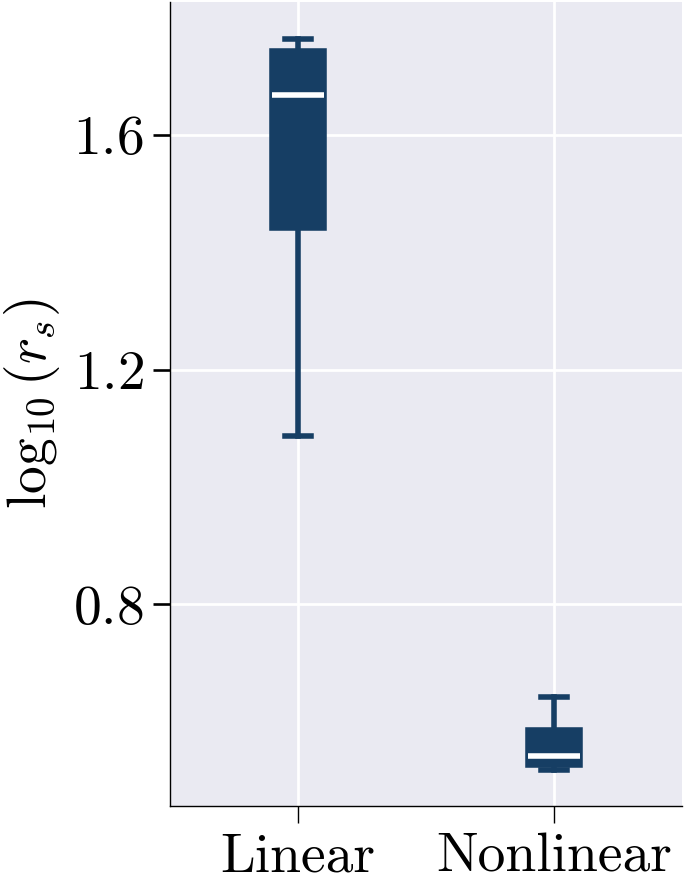

In [6]:
# Sample datasets
# import numpy as np
linear_su= np.load(os.getcwd()+'\\New_linear\\linear_speed_up.npy')
nonlinear_su= np.load(os.getcwd()+'\\New_nonlinear\\nonlinear_speed_up.npy')
# data2 = np.random.normal(1, 0.5, 100)
# data3 = np.random.normal(-1, 1.5, 100)

# Corresponding labels
labels = ['Linear','Nonlinear']
_, ax_box = plt.subplots(figsize=(4, 5))
# Call the modified function
data_stats([np.log10(linear_su),np.log10(nonlinear_su)], labels=labels, ylabel="$\log_{10}(r_s)$", xlabel="",show_mean_std=False,axbox=ax_box)
plt.savefig('speed_up_comp.pdf')

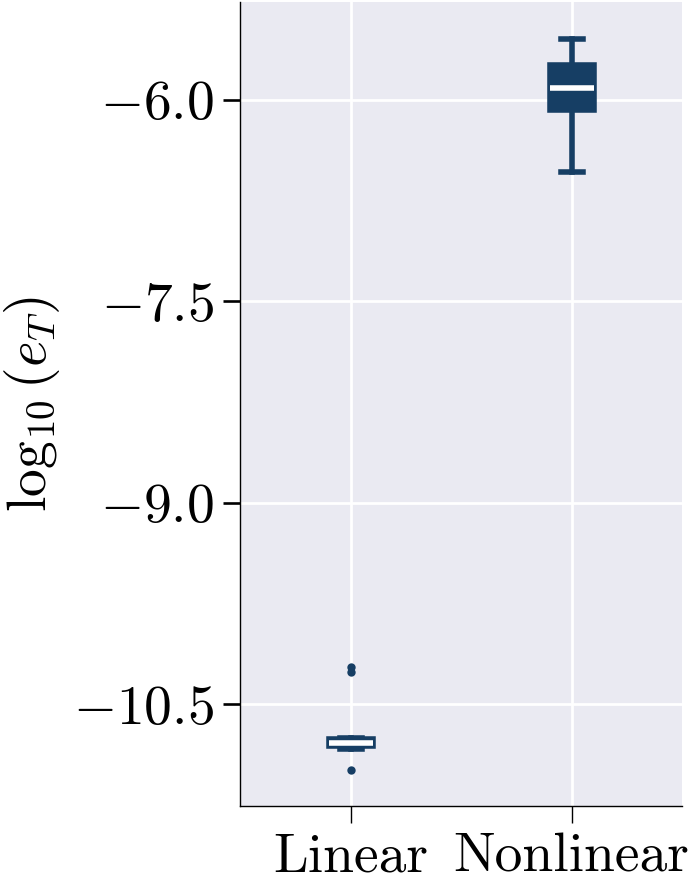

In [7]:
# Sample datasets
linear_error= np.load(os.getcwd()+'\\New_linear\\linear_rom_error.npy')
nonlinear_error=np.load(os.getcwd()+'\\New_nonlinear\\nonlinear_rom_error.npy')
# data2 = np.random.normal(1, 0.5, 100)
# data3 = np.random.normal(-1, 1.5, 100)

# Corresponding labels
labels = ['Linear','Nonlinear']
_, ax_box = plt.subplots(figsize=(4, 5))
# Call the modified function
data_stats([linear_error,nonlinear_error], labels=labels, ylabel="$\log_{10}(e_T)$", xlabel="",show_mean_std=False,axbox=ax_box)
plt.savefig('error_comp.pdf')